In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

#dataset with Disney movies and total_gross
disney_df = pd.read_csv('https://query.data.world/s/mkfcxqicohry4awyjy22wa6r3qg233?dws=00000')

disney_df

#Question to solve for: Does the popularity of a Disney movie correlate with the creation of a lego set?

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979"
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389"
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923"
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029"


In [2]:
disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].astype(str)

disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].str.replace('$', '').str.replace(',', '')

disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].astype(int)

In [3]:
disney_df['total_gross'] = disney_df['total_gross'].astype(str)

disney_df['total_gross'] = disney_df['total_gross'].str.replace('$', '').str.replace(',', '')

disney_df['total_gross'] = disney_df['total_gross'].astype(int)


In [4]:
disney_df.sort_values(by='inflation_adjusted_gross', ascending=False, inplace=True)

In [5]:
disney_df.dropna(inplace=True)

In [6]:
disney_df.drop_duplicates(inplace=True)

In [7]:
df_without_duplicates = disney_df.copy()
df_without_duplicates.reset_index(drop=True, inplace=True)

In [8]:
disney_df.genre = disney_df['genre'].apply(lambda x: 'Comedy' if x in ['Romantic Comedy', 'Black Comedy'] else 'Thriller' if x in ['Thriller/Suspense', 'Horror'] else 'Musical' if x in ['Concert/Performance'] else x)

In [9]:
disney_df.genre.value_counts()

genre
Comedy         187
Adventure      119
Drama          103
Action          36
Thriller        28
Musical         17
Documentary     16
Western          7
Name: count, dtype: int64

In [10]:
top_50 = disney_df.head(50)

In [11]:
top_50['theme_name'] = ['Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™',
                           'Marvel Super Heroes', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™', 
                           'Marvel Super Heroes', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™',
                           'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™',
                           'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™',]

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_5228/2258560670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50['theme_name'] = ['Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™',


In [12]:
top_50 = pd.DataFrame(top_50)

disney_df_reordered = ['theme_name', 'movie_title', 'release_date', 'genre', 'MPAA_rating', 'total_gross', 'inflation_adjusted_gross']

top_50 = top_50[disney_df_reordered]

In [13]:
top_50

,theme_name,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Disney™,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,5228953251
1,Disney™,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,2188229052
2,Disney™,Fantasia,"Nov 13, 1940",Musical,G,83320000,2187090808
8,Disney™,101 Dalmatians,"Jan 25, 1961",Comedy,G,153000000,1362870985
6,Disney™,Lady and the Tramp,"Jun 22, 1955",Drama,G,93600000,1236035515
3,Disney™,Song of the South,"Nov 12, 1946",Adventure,G,65000000,1078510579
564,Star Wars™,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",Adventure,PG-13,936662225,936662225
4,Disney™,Cinderella,"Feb 15, 1950",Drama,G,85000000,920608730
13,Disney™,The Jungle Book,"Oct 18, 1967",Musical,Not Rated,141843000,789612346
179,Disney™,The Lion King,"Jun 15, 1994",Adventure,G,422780140,761640898


In [14]:
# Local file path to the downloaded CSV file

file_path = '/Users/medirose/Downloads/lego_sets.csv'
# Read the CSV file into a DataFrame

legos_df = pd.read_csv(file_path)

legos_df

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.9900,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.9900,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.9900,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.9900,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.9900,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12256,7-14,36.5878,6.0,341.0,4.4,Protect NINJAGO® City from flying Manta Ray Bo...,70609.0,Help Cole save Shen-Li in this cool THE LEGO® ...,Easy,Manta Ray Bomber,4.3,THE LEGO® NINJAGO® MOVIE™,4.2,PT
12257,7-14,24.3878,8.0,217.0,4.1,Stop a Piranha Attack with Kai and Misako!,70629.0,Play out an action-packed Piranha Mech pursuit...,Easy,Piranha Attack,3.6,THE LEGO® NINJAGO® MOVIE™,4.1,PT
12258,7-14,24.3878,18.0,233.0,4.6,Stop a crime in the NINJAGO® City street market!,70607.0,"Team up with Lloyd Garmadon, Nya and Officer T...",Easy,NINJAGO® City Chase,4.6,THE LEGO® NINJAGO® MOVIE™,4.5,PT
12259,6-14,12.1878,1.0,48.0,5.0,Achieve Spinjitzu greatness with the Green Ninja!,70628.0,Learn all the skills of Spinjitzu with THE LEG...,Very Easy,Lloyd - Spinjitzu Master,5.0,THE LEGO® NINJAGO® MOVIE™,5.0,PT


In [15]:
legos_df.drop(columns=['num_reviews', 'play_star_rating', 'prod_desc', 'val_star_rating', 'country', 'prod_id', 'star_rating'], inplace=True)

In [16]:
legos_df.review_difficulty = legos_df['review_difficulty'].apply(lambda x: 'Easy' if x in ['Very Easy'] else ('Challenging' if x in ['Very Challenging'] else x))

In [17]:
legos_df['list_price'] = legos_df['list_price'].round(3)

In [18]:
legos_df.dropna(inplace=True)

In [19]:
legos_df.drop_duplicates(inplace=True)

In [20]:
df_without_duplicates = legos_df.copy()
df_without_duplicates.reset_index(drop=True, inplace=True)

In [22]:
legos_df = pd.DataFrame(legos_df)

legos_df_reordered = ['theme_name', 'set_name', 'prod_long_desc', 'list_price', 'piece_count', 'ages', 'review_difficulty']

legos_df = legos_df[legos_df_reordered]

In [23]:
legos_df = legos_df[(legos_df['theme_name'].isin(['Disney™', 'Marvel Super Heroes', 'Star Wars™']))]

In [ ]:
#keywords = ['The Avengers', 'Iron Man', 'Captain America', 'Winter Soldier' , 'Force Awakens', 'Rogue One', 'Dory', 'Nemo', 
            #'Finding Nemo', 'Dead Man', 'Pirates of the Caribbean', 'Lion King', 
            #'Cinderella', 'Lincoln', 'The Help', 'Christmas', 'Carol', 'Remember the Titans', 'Cars', 'Aladdin', 'Ratatouille', 
            #'Pretty Woman', 'Wild Hogs', '101 Dalmations', 'Lady and the Tramp',
            #'Jungle Book', 'Frozen', 'Inside Out', 'Ant-Man', 'Rabbit']


#pattern = '|'.join(keywords)
#mask = legos_df['prod_long_desc'].str.contains(pattern, case=False, regex=True)

In [ ]:
#legos2 = legos_df[mask]

In [24]:
top_lego = legos_df.head(50)

In [25]:
top_lego.sort_values(by='list_price', ascending=False, inplace=True)

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_5228/2421249652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_lego.sort_values(by='list_price', ascending=False, inplace=True)


In [26]:
top_lego

,theme_name,set_name,prod_long_desc,list_price,piece_count,ages,review_difficulty
640,Star Wars™,Death Star™,Reenact amazing scenes from the Star Wars saga...,499.99,4016.0,14+,Challenging
248,Disney™,The Disney Castle,Bring the magical world of Disney to your home...,349.99,4080.0,16+,Challenging
249,Disney™,Silent Mary,Bring the magic of Disney’s Pirates of the Car...,199.99,2294.0,14+,Average
628,Star Wars™,Kessel Run Millennium Falcon™,"Travel with Han Solo, Chewbacca and their frie...",169.99,1413.0,9-14,Average
463,Marvel Super Heroes,The Hulkbuster: Ultron Edition,Build and display this superhero toy—a highly ...,119.99,1363.0,14+,Average
464,Marvel Super Heroes,Sanctum Sanctorum Showdown,Stage a LEGO® Marvel Super Heroes 76108 Sanctu...,99.99,1004.0,8-14,Average
250,Disney™,Elsa's Magical Ice Palace,Build a grand and glittering Ice Palace for El...,79.99,701.0,6-12,Average
629,Star Wars™,Imperial TIE Fighter™,Engage the enemy with the LEGO® Star Wars Impe...,69.99,519.0,9-14,Average
251,Disney™,Cinderella's Dream Castle,LEGO® l Disney Cinderella’s Dream Castle is th...,69.99,585.0,6-12,Challenging
465,Marvel Super Heroes,Thanos: Ultimate Battle,Fly into conflict on an uncharted planet aboar...,69.99,674.0,8-14,Average


In [28]:
top_lego.describe(include= 'object')

,theme_name,set_name,prod_long_desc,ages,review_difficulty
count,50,50,50,50,50
unique,3,50,50,10,3
top,Marvel Super Heroes,Death Star™,Reenact amazing scenes from the Star Wars saga...,6-12,Easy
freq,25,1,1,16,29


<Axes: xlabel='theme_name', ylabel='count'>

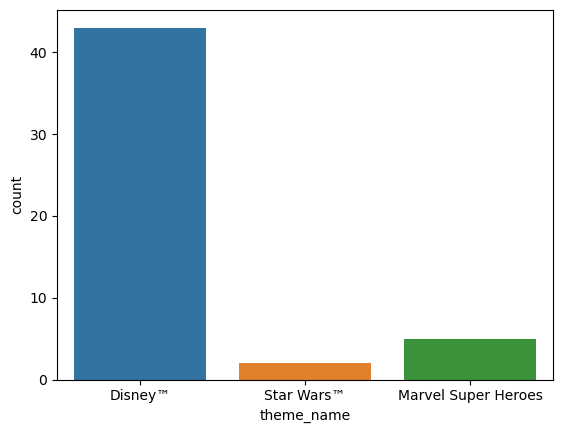

In [ ]:
sns.countplot(x='theme_name', data=top_50)

<Axes: xlabel='theme_name', ylabel='count'>

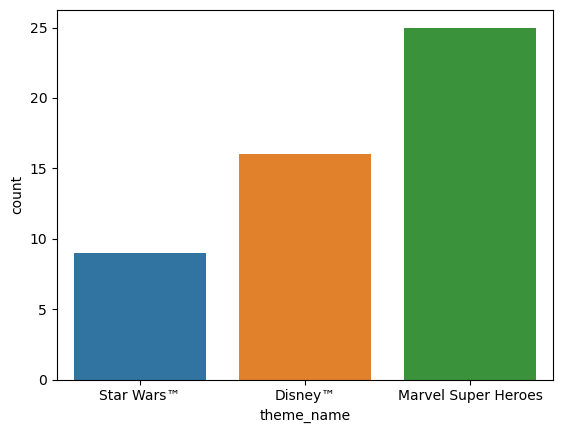

In [ ]:
sns.countplot(x='theme_name', data=top_lego)

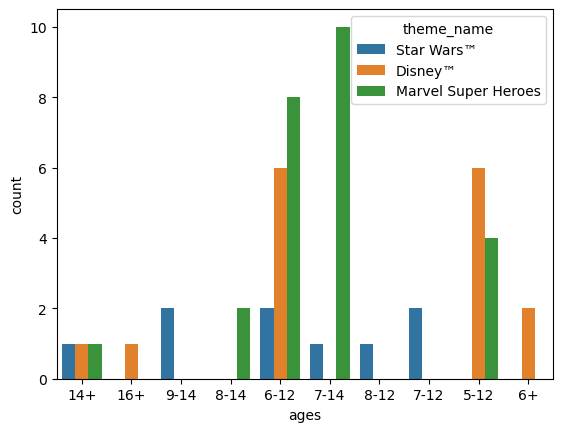

In [40]:
sns.countplot(x='ages', hue='theme_name', data=top_lego)
plt.show()

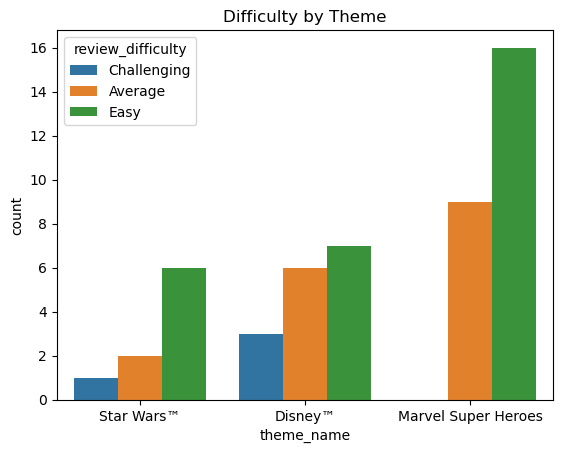

In [39]:
sns.countplot(x='theme_name', hue='review_difficulty', data=top_lego)
plt.title('Difficulty by Theme')
plt.show()

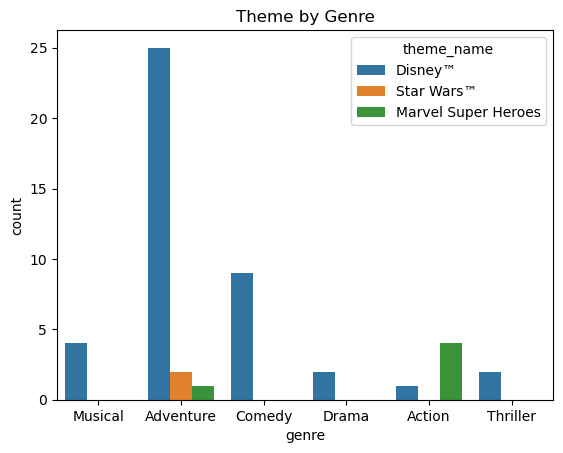

In [38]:
sns.countplot(x='genre', hue='theme_name', data=top_50)
plt.title('Theme by Genre')
plt.show()

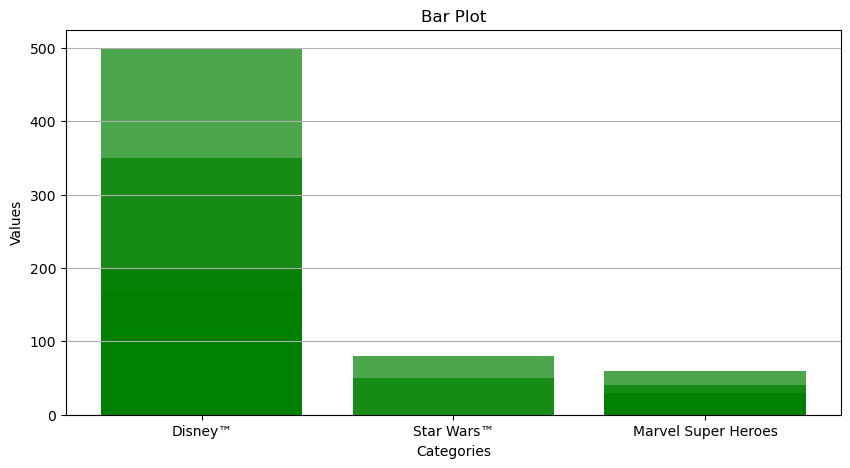

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(top_50['theme_name'], top_lego['list_price'], color='g', alpha=0.7)
plt.xlabel('Categories')  # Label for the X-axis
plt.ylabel('Values')  # Label for the Y-axis
plt.title('Bar Plot')  # Title of the plot
plt.grid(axis='y')  # Show grid on the Y-axis only
plt.show()  # Show the plot

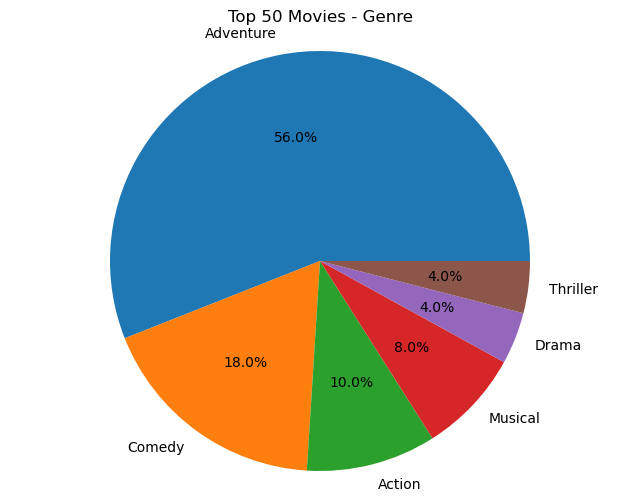

In [36]:
data = {'genre': ['Action', 'Adventure', 'Drama', 'Western', 'Comedy', 'Musical', 'Documentary', 'Thriller']}
df = pd.DataFrame(data)

# Count the occurrences of each genre
genre_counts = top_50['genre'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 50 Movies - Genre')
plt.ylabel('')  # Remove the default 'genre' label on the y-axis
plt.axis('equal')

plt.show()

In [ ]:
#top_data1 = action_df.head(10)
#top_data2 = adventure_df.head(10)
#top_data3 = drama_df.head(10)
#top_data4 = comedy_df.head(10)

#merged_df = pd.concat([top_data1, top_data2, top_data3, top_data4])

#merged_df

#action_df = disney_df[(disney_df['genre'] == 'Action')]